In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Equation d'advection

${\large \frac{\partial u}{\partial t}+a\frac{\partial u}{\partial x}=0} \, \mbox{  pour  } \begin{cases} 0 <x<\infty ,\\ 0 <t \end{cases} $, $u(0,t)=0$

On définit ${\large \lambda =a\frac{\Delta x}{\Delta x}}$

Upwind:

$
{\large u_{i,j+1}=(1-\lambda)u_{i,j}+\lambda u_{i-1,j}}
$

Downwind:

$
{\large u_{i,j+1}=(1+\lambda)u_{i,j}-\lambda u_{i+1,j}}
$

Lax-Wendroff:

$
{\large u_{i,j+1}=-\frac{1}{2}(1-\lambda)u_{i+1,j}+(1-\lambda^{2}) u_{i,j}+\frac{1}{2}(1+\lambda)u_{i-1,j}}
$

In [33]:

def Create_Init(x,x1,x2,yy):
    y=np.zeros(np.size(x))
    for i in range(np.size(x)):
        if x[i]>x1 and x[i]<x2:
            y[i]=yy
    return(y)

def f(y,a,b):
    k=y.size
    l=b-a
    h=np.zeros(k)
    for p in range(k):
        if y[p]>=(b+a)/2-(b-a)/4 and y[p]<=(b+a)/2+(b-a)/4:
            h[p]=0.5*(1.-np.cos(2.*np.pi*((y[p]-(b+a)/2)/l)))
            h[p]=(1+np.cos(2.*np.pi*((y[p]-(b+a)/2)/(l/2))))*0.5
    return(h)


def integration_adv(U0,a,x,tmax,lmb,int_mode):
    h=np.abs(x[1]-x[0])
    k=lmb*h/(abs(a))
    M=int(np.round(tmax/k))+1
    t=np.linspace(0.,tmax,M)
    k=t[1]-t[0]
    lmb=(a)*k/h
    U=np.zeros((np.shape(x)[0],np.shape(t)[0]))
    U[:,0]=U0
    #Upwind
    if int_mode=='Upwind':
        for i in range(M-1):
            U[1:-1,i+1]=(1-lmb)*U[1:-1,i]+lmb*U[0:-2,i]
            U[0,i+1]=0
            U[-1,i+1]=0
    elif int_mode=='Downwind':
        for i in range(M-1):
            U[1:-1,i+1]=(1+lmb)*U[1:-1,i]-lmb*U[2:,i]
            U[0,i+1]=0
            U[-1,i+1]=0
    elif int_mode=='Lax-Wendroff':
        A=-(1/2)*lmb*(1-lmb)
        B=(1-lmb**2)
        C=0.5*lmb*(1+lmb)
        for i in range(M-1):
            U[1:-1,i+1]=A*U[2:,i]+B*U[1:-1,i]+C*U[0:-2,i]
            U[0,i+1]=0
            U[-1,i+1]=0
    else:
        print('Unknown integration scheme')	
        U=0
    return(U,x,t)


In [37]:
a=1

lmb=1.25
L=150
N=1001
x=np.linspace(-L,L,2*N+3)
tmax=100
print(x[1]-x[0])
U0_carre=Create_Init(x,4,5,1)
a_cos=0
b_cos=20
U0_cos=f(x,a_cos,b_cos)

U_up_carre=integration_adv(U0_carre,a,x,tmax,lmb,'Upwind')
U_down_carre=integration_adv(U0_carre,a,x,tmax,lmb,'Downwind')
U_lw_carre=integration_adv(U0_carre,a,x,tmax,lmb,'Lax-Wendroff')

U_up_cos=integration_adv(U0_cos,a,x,tmax,lmb,'Upwind')
U_down_cos=integration_adv(U0_cos,a,x,tmax,lmb,'Downwind')
U_lw_cos=integration_adv(U0_cos,a,x,tmax,lmb,'Lax-Wendroff')


0.14970059880238296


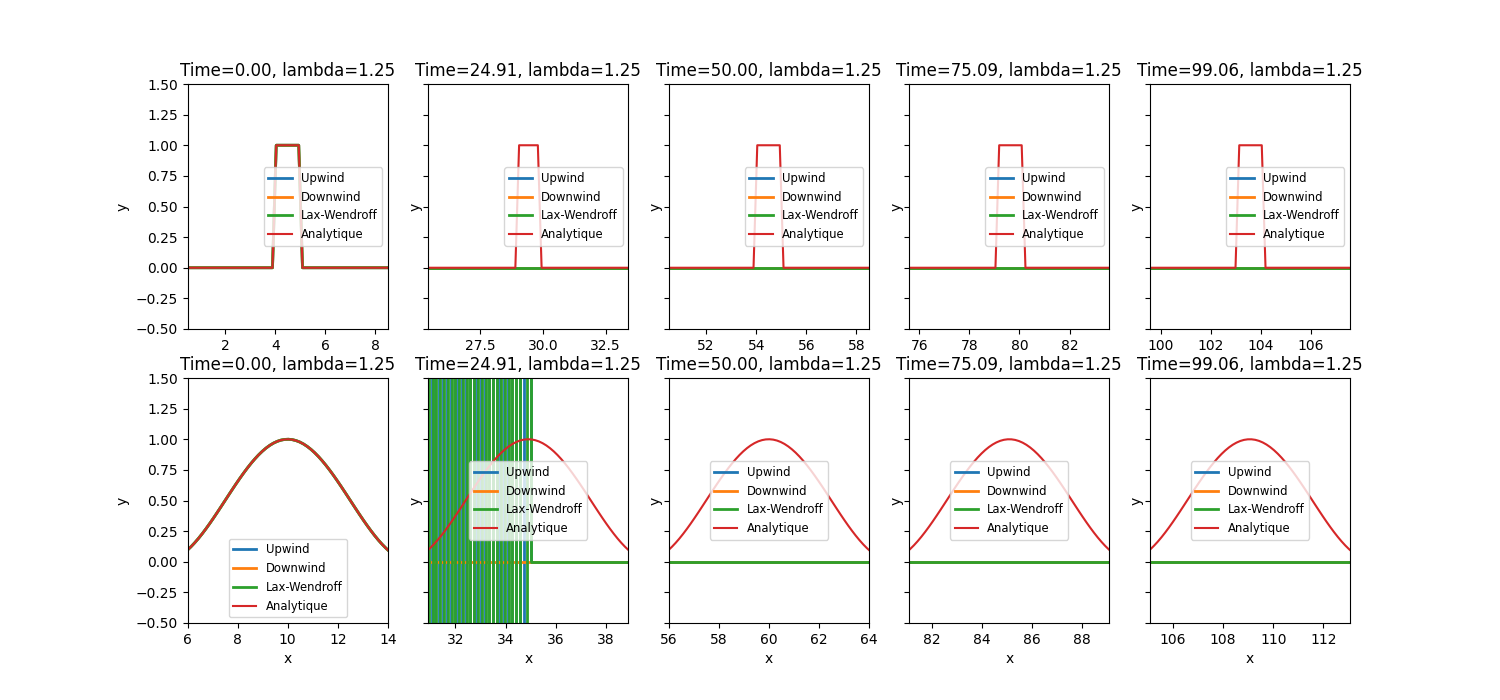

In [39]:
t=U_up_carre[2]
M=t.shape[0]
Mspan=[0,0.25,0.5,0.75,0.99]


fig,ax=plt.subplots(2,5,figsize=(15,7),sharey='row')
for i in range(len(Mspan)):
    n=int(np.floor(M*Mspan[i]))
    center_carre=4.5+a*t[n]
    center_cos=(b_cos+a_cos)/2+a*t[n]
    ax[0,i].plot(x,U_up_carre[0][:,n],label='Upwind',linewidth=2.)
    ax[0,i].plot(x,U_down_carre[0][:,n],label='Downwind',linewidth=2.)
    ax[0,i].plot(x,U_lw_carre[0][:,n],label='Lax-Wendroff',linewidth=2.)
    ax[0,i].plot(x,Create_Init(x-a*t[n],4,5,1),label='Analytique')
    ax[0,i].set_ylabel('y')
    ax[0,i].set_ylim((-0.5,1.5))
    ax[0,i].set_xlim((center_carre-4,center_carre+4))
    ax[0,i].set_title('Time=%.2f, lambda=%.2f'%(t[n],lmb))
    ax[0,i].legend(loc='best',fontsize='small')
    ax[1,i].plot(x,U_up_cos[0][:,n],label='Upwind',linewidth=2.)
    ax[1,i].plot(x,U_down_cos[0][:,n],label='Downwind',linewidth=2.)
    ax[1,i].plot(x,U_lw_cos[0][:,n],label='Lax-Wendroff',linewidth=2.)
    ax[1,i].plot(x,f(x-a*t[n],a_cos,b_cos),label='Analytique')
    ax[1,i].set_xlabel('x')
    ax[1,i].set_ylabel('y')
    ax[1,i].set_ylim((-0.5,1.5))
    ax[1,i].set_xlim((center_cos-4,center_cos+4))
    ax[1,i].set_title('Time=%.2f, lambda=%.2f'%(t[n],lmb))
    ax[1,i].legend(loc='best',fontsize='small')
    

Condition CFL
--------
Le domaine de dépendence numérique du schéma doit contenir le domaine de dépendance du problème initial. 
Pour les trois schémas, la condition est la même $\lambda \leq 1$

Stabilité
----
Pour comprende le comportement des différents schémas numériques, il faut effectuer une analyse de stabilité (Von Neumann). 

On pose

On pose

${\large y_{i,j}=w_{j}e^{ikx_{i}}}$

En remplacant cette expression dans le schéma numérique,

${\large y_{i,j+1}=\kappa \, w_{j}e^{ikx_{i}}=\kappa \, y_{i,j}}$ où ${\large \kappa }$ est appelé le facteur d'amplification.

Ce facteur d'amplification peut se réécrire comme suit


${\large \kappa =|\kappa | e^{I\theta_{d}} y_{i,j}}$, où ${\large \theta_{d}=arctg(\frac{\Im(\kappa)}{\Re(\kappa)})}$ est le déphasage à chaque pas de temps de la solution numérique.

Considérons une solution analytique de la forme:

${\large y(x,t)=Ue^{i(kx-\omega t)}}$

En remplacant dans l'équation d'advection

${\large Y(-i\omega) e^{i(kx-\omega t)}+a (ikx)e^{i(kx-\omega t)}}=0$

${\large \Rightarrow \omega=k a}$ (relation de dispersion). Ce système est non dispersif.

On veut maintenant connaitre l'évolution "vraie" à chaque pas de temps de ma solution analytique.

${\large y(x,t+\Delta t)=Ye^{i(kx-\omega (t+\Delta t))}=e^{-i\omega \Delta t}Ye^{i(kx-\omega t)}=\kappa_{a} Ye^{i(kx-\omega t)}}$

avec ${\large \kappa_{a}=e^{-i\omega \Delta t}=e^{-i ak\Delta x}=e^{-i \lambda k \Delta x}=e^{i\theta_{a}}}$. ${\large \theta_{a}}$ est le déphasage à chaque pas de temps de la solution analytique. 

On voit que pour la solution analytique, le facteur d'amplification ${\large \kappa_{a}}$ est de norme 1 et sa seule contribution est un déphasage.

Ce ${\large \kappa_{a}}$ est à comparer avec le ${\large \kappa}$ pour évaluer la qualité du schéma numérique.

Deux points à vérifier:

- ${\large |\kappa|  ==1 }$ pour éviter la dissipation. En effet l'équation d'advection est non dissipative.
- ${\large \frac{\theta_{d}}{\theta_{a}}=\frac{c_{d}}{c_{a}}==1}$ pour toutes les longeurs d'onde pour éviter la dispersion. 


Text(0.5, 1.0, '$\\frac{\\theta_{d}}{\\theta_{a}}$')

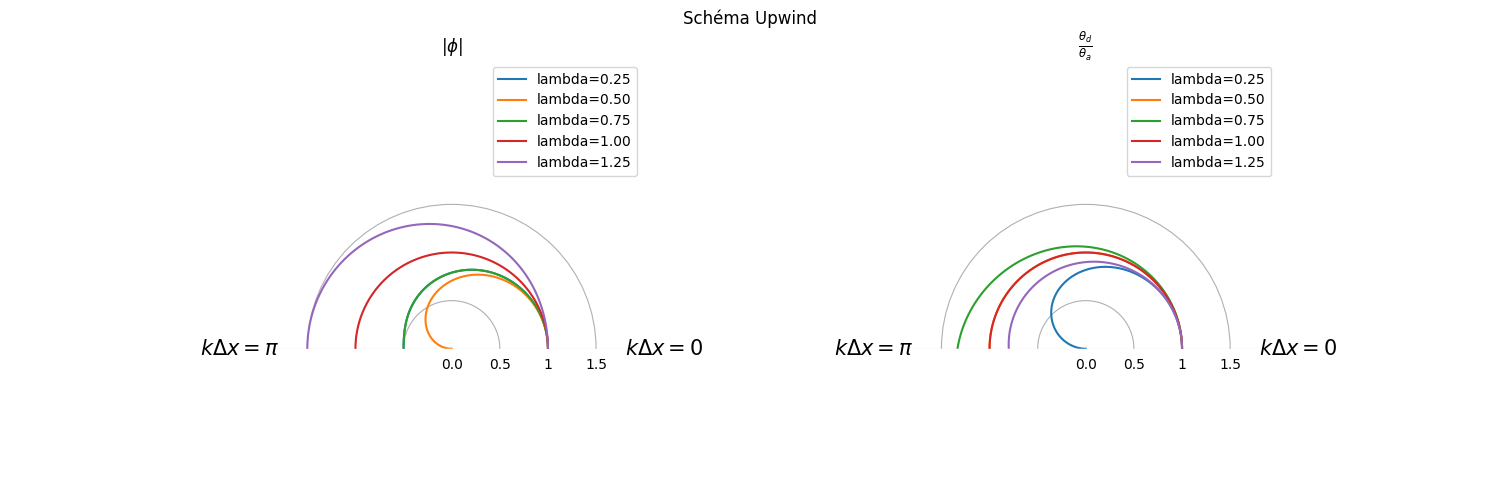

In [51]:
#Upwind
ko=np.linspace(0.01,np.pi-0.001,100)

lmb=[0.25,0.5,0.75,1.,1.25]

fig,ax=plt.subplots(1,2,figsize=(15,5),subplot_kw=dict(polar=True))
for i in range(len(lmb)):
    ampl_R=1-lmb[i]+lmb[i]*np.cos(ko)
    ampl_I=-lmb[i]*np.sin(ko)
    ampl=1-lmb[i]+lmb[i]*np.cos(ko)+(1j)*(-lmb[i]*np.sin(ko))
    ratio=np.arctan(ampl_I/ampl_R)/(-lmb[i]*ko)
    ratio=np.arctan2(np.imag(ampl),np.real(ampl))/(-lmb[i]*ko)
    ax[0].plot(ko,np.sqrt(ampl_R**2+ampl_I**2),label='lambda=%.2f'%(lmb[i]))
    ax[1].plot(ko,np.abs(ratio),label='lambda=%.2f'%(lmb[i]))

fig.suptitle('Schéma Upwind')
ax[0].set_rmax(2)
ax[0].set_rgrids([0.0,0.5, 1, 1.5],labels=['0.0','0.5', '1', '1.5'],fontsize=20)
ax[0].set_frame_on(False)
ax[0].set_thetamax(180)
ax[0].set_thetagrids(angles=[0,180],labels=['$k\Delta x=0$','$k\Delta x=\pi$'],fontsize=15)
ax[0].legend()
ax[0].set_title(r'$|\phi |$')
ax[1].set_rmax(2)
ax[1].set_rgrids([0.0,0.5, 1, 1.5],labels=['0.0','0.5', '1', '1.5'],fontsize=20)
ax[1].set_frame_on(False)
ax[1].set_thetamax(180)
ax[1].set_thetagrids(angles=[0,180],labels=['$k\Delta x=0$','$k\Delta x=\pi$'],fontsize=15)
ax[1].legend()
ax[1].set_title(r'$\frac{\theta_{d}}{\theta_{a}}$')



Text(0.5, 1.0, '$\\frac{\\theta_{d}}{\\theta_{a}}$')

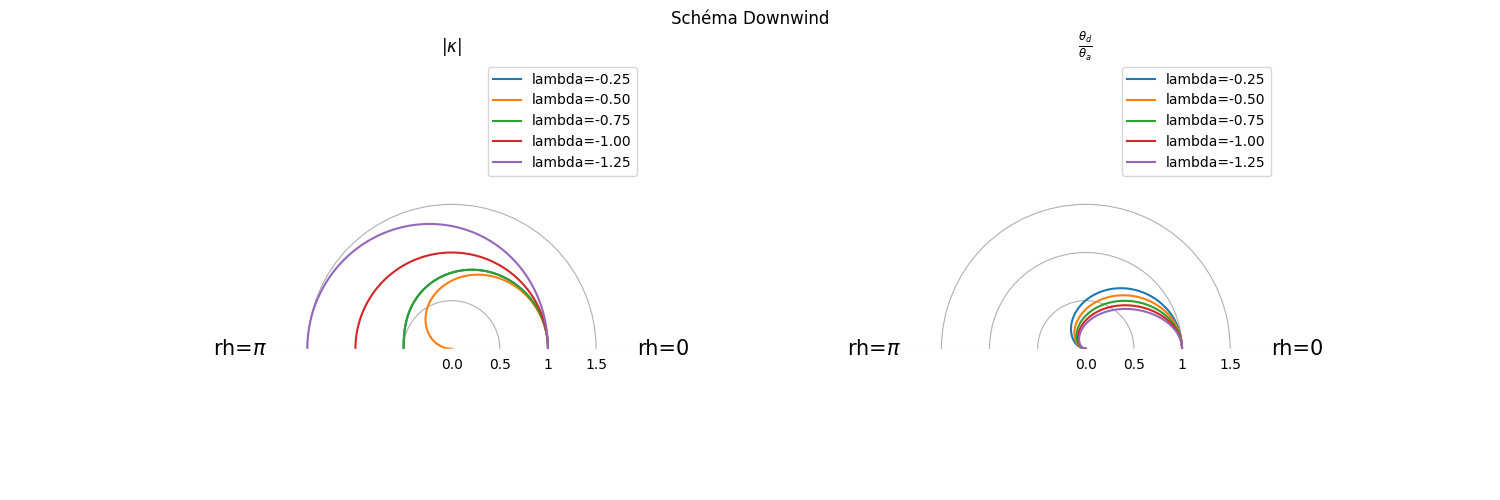

In [24]:
#Downwind
ko=np.linspace(0.01,np.pi-0.001,100)

lmb=-np.array([0.25,0.5,0.75,1.,1.25])

fig,ax=plt.subplots(1,2,figsize=(15,5),subplot_kw=dict(polar=True))
for i in range(lmb.shape[0]):
    ampl_R=1+lmb[i]-lmb[i]*np.cos(ko)
    ampl_I=-lmb[i]*np.sin(ko)
    ampl=1-lmb[i]+lmb[i]*np.cos(ko)+(1j)*(-lmb[i]*np.sin(ko))
    ratio=np.arctan(ampl_I/ampl_R)/(-lmb[i]*ko)
    ratio=np.arctan2(np.imag(ampl),np.real(ampl))/(-lmb[i]*ko)
    ax[0].plot(ko,np.sqrt(ampl_R**2+ampl_I**2),label='lambda=%.2f'%(lmb[i]))
    ax[1].plot(ko,np.abs(ratio),label='lambda=%.2f'%(lmb[i]))

fig.suptitle('Schéma Downwind')
ax[0].set_rmax(2)
ax[0].set_rgrids([0.0,0.5, 1, 1.5],labels=['0.0','0.5', '1', '1.5'],fontsize=20)
ax[0].set_frame_on(False)
ax[0].set_thetamax(180)
ax[0].set_thetagrids(angles=[0,180],labels=['$k\Delta x=0$','$k\Delta x=\pi$'],fontsize=15)
ax[0].legend()
ax[0].set_title(r'$|\phi |$')
ax[1].set_rmax(2)
ax[1].set_rgrids([0.0,0.5, 1, 1.5],labels=['0.0','0.5', '1', '1.5'],fontsize=20)
ax[1].set_frame_on(False)
ax[1].set_thetamax(180)
ax[1].set_thetagrids(angles=[0,180],labels=['$k\Delta x=0$','$k\Delta x=\pi$'],fontsize=15)
ax[1].legend()
ax[1].set_title(r'$\frac{\theta_{d}}{\theta_{a}}$')



Text(0.5, 1.0, '$\\frac{\\theta_{d}}{\\theta_{a}}$')

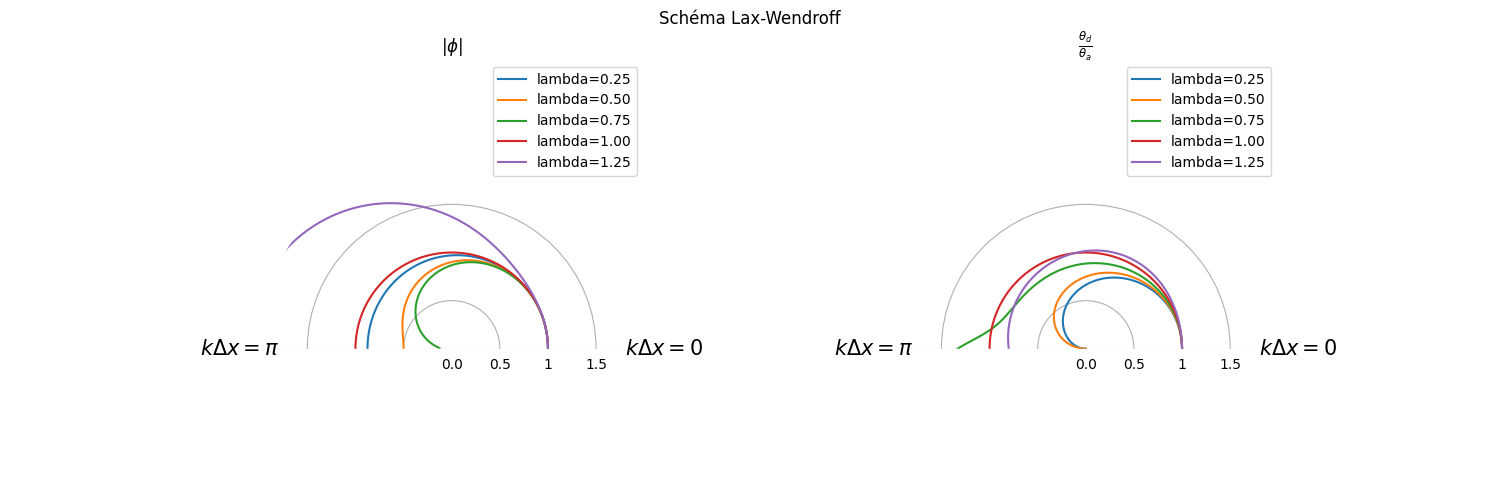

In [50]:
#Lax-Wendroff
ko=np.linspace(0.01,np.pi-0.001,100)

lmb=np.array([0.25,0.5,0.75,1.,1.25])
fig,ax=plt.subplots(1,2,figsize=(15,5),subplot_kw=dict(polar=True))
for i in range(len(lmb)):
    ampl_R=1-lmb[i]**2+lmb[i]**2*np.cos(ko)
    ampl_I=-lmb[i]*np.sin(ko)
    ampl=1-lmb[i]**2+lmb[i]**2*np.cos(ko)+(1j)*(-lmb[i]*np.sin(ko))
    ratio=np.arctan(ampl_I/ampl_R)/(-lmb[i]*ko)
    ratio=np.arctan2(np.imag(ampl),np.real(ampl))/(-lmb[i]*ko)
    ax[0].plot(ko,np.sqrt(ampl_R**2+ampl_I**2),label='lambda=%.2f'%(lmb[i]))
    ax[1].plot(ko,np.abs(ratio),label='lambda=%.2f'%(lmb[i]))

fig.suptitle('Schéma Lax-Wendroff') 
ax[0].set_rmax(2)
ax[0].set_rgrids([0.0,0.5, 1, 1.5],labels=['0.0','0.5', '1', '1.5'],fontsize=20)
ax[0].set_frame_on(False)
ax[0].set_thetamax(180)
ax[0].set_thetagrids(angles=[0,180],labels=['$k\Delta x=0$','$k\Delta x=\pi$'],fontsize=15)
ax[0].legend()
ax[0].set_title(r'$|\phi |$')
ax[1].set_rmax(2)
ax[1].set_rgrids([0.0,0.5, 1, 1.5],labels=['0.0','0.5', '1', '1.5'],fontsize=20)
ax[1].set_frame_on(False)
ax[1].set_thetamax(180)
ax[1].set_thetagrids(angles=[0,180],labels=['$k\Delta x=0$','$k\Delta x=\pi$'],fontsize=15)
ax[1].legend()
ax[1].set_title(r'$\frac{\theta_{d}}{\theta_{a}}$')



# Leapfrog pour l'advection

Un schéma leapfrog pour résoudre l'équation d'advection est  $u_{i,j+1}=u_{i,j-1}-\lambda (u_{i+1,j}-u_{i-1,j}).$

In [52]:

import numpy as np
import matplotlib.pyplot as plt


def Create_Init(x,x1,x2,yy):
    y=np.zeros(np.size(x))
    for i in range(np.size(x)):
        if x[i]>x1 and x[i]<x2:
            y[i]=yy
    return(y)
def f(y,a,b):
    k=y.size
    l=b-a
    h=np.zeros(k)
    for p in range(k):
        if y[p]>=(b+a)/2-(b-a)/4 and y[p]<=(b+a)/2+(b-a)/4:
            h[p]=0.5*(1.-np.cos(2.*np.pi*((y[p]-(b+a)/2)/l)))
            h[p]=(1+np.cos(2.*np.pi*((y[p]-(b+a)/2)/(l/2))))*0.5
    return(h)


def Leapfrog_adv(U0,a,x,tmax,lmb):
    h=np.abs(x[1]-x[0])
    k=lmb*h/(abs(a))
    M=int(np.round(tmax/k))+1
    t=np.linspace(0.,tmax,M)
    k=t[1]-t[0]
    lmb=np.abs(a)*k/h
    U=np.zeros((np.shape(x)[0],np.shape(t)[0]))
    U[:,0]=U0
    for i in range(M-1):
        if i==0:
            U[1:-1,i+1]=(1-lmb)*U[1:-1,i]+lmb*U[0:-2,i]
            U[0,i+1]=0
            U[-1,i+1]=0
        else:
            U[1:-1,i+1]=U[1:-1,i-1]-lmb*(U[2:,i]-U[0:-2,i])
            U[0,i+1]=0
            U[-1,i+1]=0
    return(U,x,t)



def integration_adv(U0,a,x,tmax,lmb,int_mode):
    h=np.abs(x[1]-x[0])
    k=lmb*h/(abs(a))
    M=int(np.round(tmax/k))+1
    t=np.linspace(0.,tmax,M)
    k=t[1]-t[0]
    lmb=np.abs(a)*k/h
    U=np.zeros((np.shape(x)[0],np.shape(t)[0]))
    U[:,0]=U0
    #Upwind
    if int_mode=='Upwind':
        for i in range(M-1):
            U[1:-1,i+1]=(1-lmb)*U[1:-1,i]+lmb*U[0:-2,i]
            U[0,i+1]=0
            U[-1,i+1]=0
    elif int_mode=='Downwind':
        for i in range(M-1):
            U[1:-1,i+1]=(1+lmb)*U[1:-1,i]-lmb*U[2:,i]
            U[0,i+1]=0
            U[-1,i+1]=0
    elif int_mode=='Lax-Wendroff':
        A=-(1/2)*lmb*(1-lmb)
        B=(1-lmb**2)
        C=0.5*lmb*(1+lmb)
        for i in range(M-1):
            U[1:-1,i+1]=A*U[2:,i]+B*U[1:-1,i]+C*U[0:-2,i]
            U[0,i+1]=0
            U[-1,i+1]=0
    else:
        print('Unknown integration scheme')	
        U=0
    return(U,x,t)


In [53]:
a=1

lmb=0.6
L=150
N=1001
x=np.linspace(0.,L,N+2)
tmax=100

U0_carre=Create_Init(x,4,5,1)
a_cos=0
b_cos=20
U0_cos=f(x,a_cos,b_cos)

U_up_carre=integration_adv(U0_carre,a,x,tmax,lmb,'Upwind')
U_down_carre=integration_adv(U0_carre,a,x,tmax,lmb,'Downwind')
U_lw_carre=integration_adv(U0_carre,a,x,tmax,lmb,'Lax-Wendroff')
U_lp_carre=Leapfrog_adv(U0_carre,a,x,tmax,lmb)

U_up_cos=integration_adv(U0_cos,a,x,tmax,lmb,'Upwind')
U_down_cos=integration_adv(U0_cos,a,x,tmax,lmb,'Downwind')
U_lw_cos=integration_adv(U0_cos,a,x,tmax,lmb,'Lax-Wendroff')
U_lp_cos=Leapfrog_adv(U0_cos,a,x,tmax,lmb)


/tmp/ipykernel_33473/3480751501.py:61: RuntimeWarning: overflow encountered in subtract
  U[1:-1,i+1]=(1+lmb)*U[1:-1,i]-lmb*U[2:,i]
/tmp/ipykernel_33473/3480751501.py:61: RuntimeWarning: overflow encountered in multiply
  U[1:-1,i+1]=(1+lmb)*U[1:-1,i]-lmb*U[2:,i]


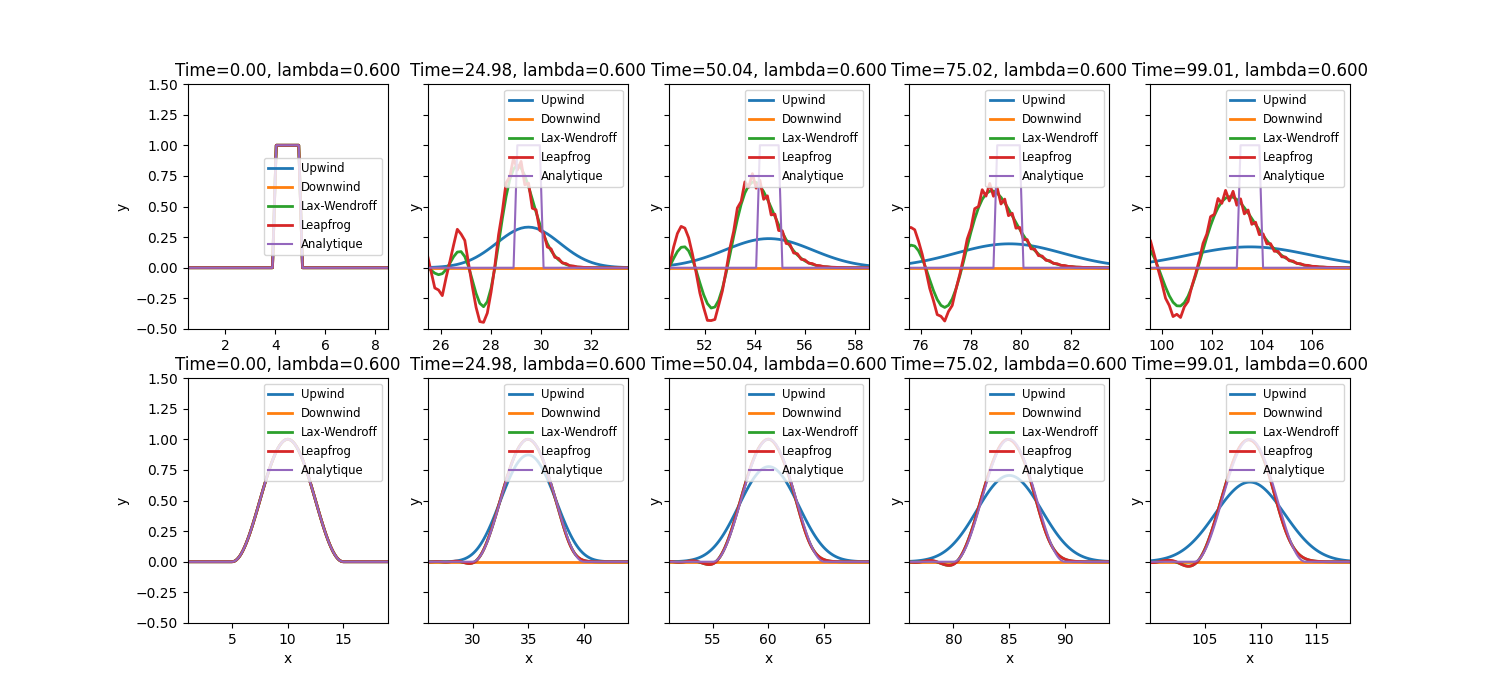

In [54]:
t=U_up_carre[2]
M=t.shape[0]
Mspan=[0,0.25,0.5,0.75,0.99]



fig,ax=plt.subplots(2,5,figsize=(15,7),sharey='row')
for i in range(len(Mspan)):
    n=int(np.floor(M*Mspan[i]))
    center_carre=4.5+a*t[n]
    center_cos=(b_cos+a_cos)/2+a*t[n]
    ax[0,i].plot(x,U_up_carre[0][:,n],label='Upwind',linewidth=2.)
    ax[0,i].plot(x,U_down_carre[0][:,n],label='Downwind',linewidth=2.)
    ax[0,i].plot(x,U_lw_carre[0][:,n],label='Lax-Wendroff',linewidth=2.)
    ax[0,i].plot(x,U_lp_carre[0][:,n],label='Leapfrog',linewidth=2.)
    ax[0,i].plot(x,Create_Init(x-a*t[n],4,5,1),label='Analytique')
    #ax[0,i].set_xlabel('x')
    ax[0,i].set_ylabel('y')
    ax[0,i].set_ylim((-0.5,1.5))
    ax[0,i].set_xlim((center_carre-4,center_carre+4))
    ax[0,i].set_title('Time=%.2f, lambda=%.3f'%(t[n],lmb))
    ax[0,i].legend(loc='best',fontsize='small')
    ax[1,i].plot(x,U_up_cos[0][:,n],label='Upwind',linewidth=2.)
    ax[1,i].plot(x,U_down_cos[0][:,n],label='Downwind',linewidth=2.)
    ax[1,i].plot(x,U_lw_cos[0][:,n],label='Lax-Wendroff',linewidth=2.)
    ax[1,i].plot(x,U_lp_cos[0][:,n],label='Leapfrog',linewidth=2.)
    ax[1,i].plot(x,f(x-a*t[n],a_cos,b_cos),label='Analytique')
    ax[1,i].set_xlabel('x')
    ax[1,i].set_ylabel('y')
    ax[1,i].set_ylim((-0.5,1.5))
    ax[1,i].set_xlim((center_cos-(b_cos-a_cos)/4-4,center_cos+(b_cos-a_cos)/4+4))
    ax[1,i].set_title('Time=%.2f, lambda=%.3f'%(t[n],lmb))
    ax[1,i].legend(loc='best',fontsize='small')
    
    

Text(0.5, 1.0, '$\\frac{\\theta_{d}}{\\theta_{a}}$')

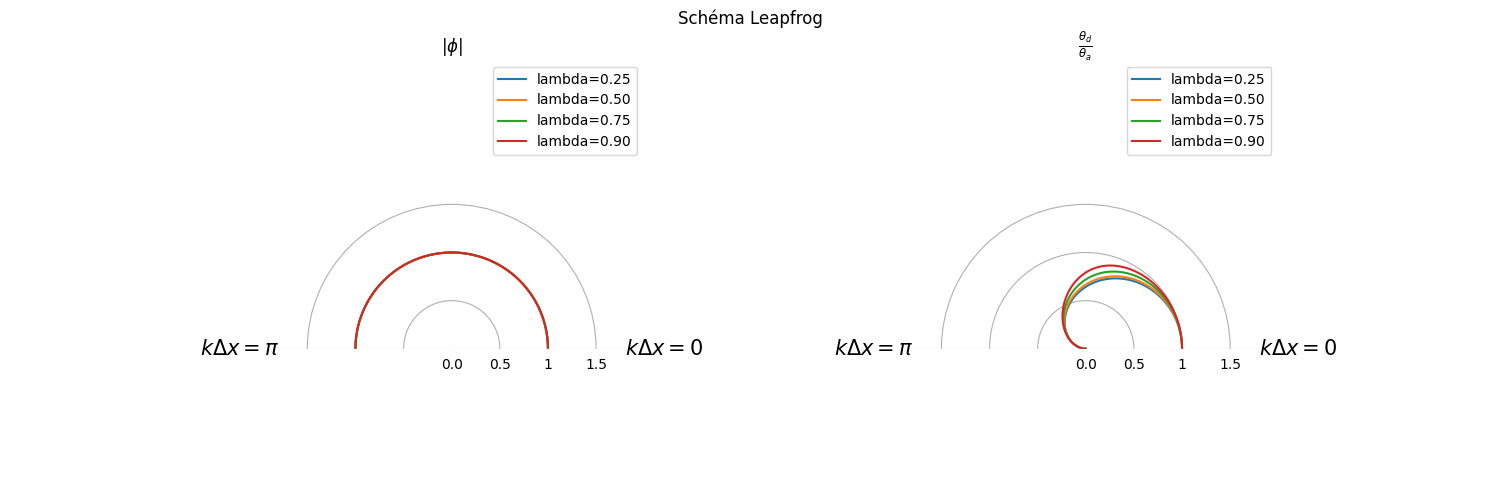

In [56]:
#Leapfrog
ko=np.linspace(0.01,np.pi-0.001,100)

lmb=[0.25,0.5,0.75,0.9]
fig,ax=plt.subplots(1,2,figsize=(15,5),subplot_kw=dict(polar=True))
for i in range(len(lmb)):
    ampl_R=1-lmb[i]+lmb[i]*np.cos(ko)
    ampl_I=-lmb[i]*np.sin(ko)
    ampl=(-1j*lmb[i]*np.sin(ko)+np.sqrt(1-(lmb[i]*np.sin(ko))**2))
    ratio=np.arctan2(np.imag(ampl),np.real(ampl))/(-lmb[i]*ko)
    ax[0].plot(ko,np.abs(ampl),label='lambda=%.2f'%(lmb[i]))
    ax[1].plot(ko,ratio,label='lambda=%.2f'%(lmb[i]))

fig.suptitle('Schéma Leapfrog') 
ax[0].set_rmax(2)
ax[0].set_rgrids([0.0,0.5, 1, 1.5],labels=['0.0','0.5', '1', '1.5'],fontsize=20)
ax[0].set_frame_on(False)
ax[0].set_thetamax(180)
ax[0].set_thetagrids(angles=[0,180],labels=['$k\Delta x=0$','$k\Delta x=\pi$'],fontsize=15)
ax[0].legend()
ax[0].set_title(r'$|\phi|$')
ax[1].set_rmax(2)
ax[1].set_rgrids([0.0,0.5, 1, 1.5],labels=['0.0','0.5', '1', '1.5'],fontsize=20)
ax[1].set_frame_on(False)
ax[1].set_thetamax(180)
ax[1].set_thetagrids(angles=[0,180],labels=['$k\Delta x=0$','$k\Delta x=\pi$'],fontsize=15)
ax[1].legend()
ax[1].set_title(r'$\frac{\theta_{d}}{\theta_{a}}$')




# Advection radioactive

Considérez l'équation $u_{t}+au_{x}+bu=0$, où $a,b$ sont des constantes positives, et $u(x,0)=g(x)$.

$g(x)=\begin{cases} \frac{1}{2}(1-cos(2\pi x)) \, \mbox{si } 0\leq x \leq 1,\\ 0 \quad \mbox{sinon} \end{cases} $

In [57]:
def g(y):
    k=y.size
    h=np.zeros(k)
    for p in range(k):
        if y[p]>=0. and y[p]<=1.:
            h[p]=0.5*(1.-np.cos(2.*np.pi*y[p]))
    return(h)



def lw_adv_radio(U0,a,b,x,tmax,lmb):
    h=np.abs(x[1]-x[0])
    k=lmb*h/(abs(a))
    M=int(np.round(tmax/k))+1
    t=np.linspace(0.,tmax,M)
    k=t[1]-t[0]
    lmb=np.abs(a)*k/h
    A=0.5*((1-b*k)*lmb**2-(1-b*k+(1/2)*b**2*k**2)*lmb)
    B=1-b*k+(1/2)*b**2*k**2-(1/6)*b**3*k**3-(1-b*k)*lmb**2
    C=0.5*((1-b*k)*lmb**2+(1-b*k+0.5*b**2*k**2)*lmb)
    U=np.zeros((np.shape(x)[0],np.shape(t)[0]))
    U[:,0]=U0
    for i in range(M-1):
        U[1:-1,i+1]=A*U[2:,i]+B*U[1:-1,i]+C*U[0:-2,i]
        U[0,i+1]=0
        U[-1,i+1]=0
    return(U,x,t)



   

In [58]:
tmax=10.
a=1.
b=1./7.
N=502
xL=-2.
xR=12.
x=np.linspace(xL,xR,N+2)

lmb=0.75

U0=g(x)

U_lw_radio=lw_adv_radio(U0,a,b,x,tmax,lmb)
t=U_lw_radio[2]

M=t.shape[0]
Sol=np.zeros((N+2,M))
for p in range(M):
    Sol[:,p]=g(x-a*t[p])*np.exp(-b*t[p])
    
 

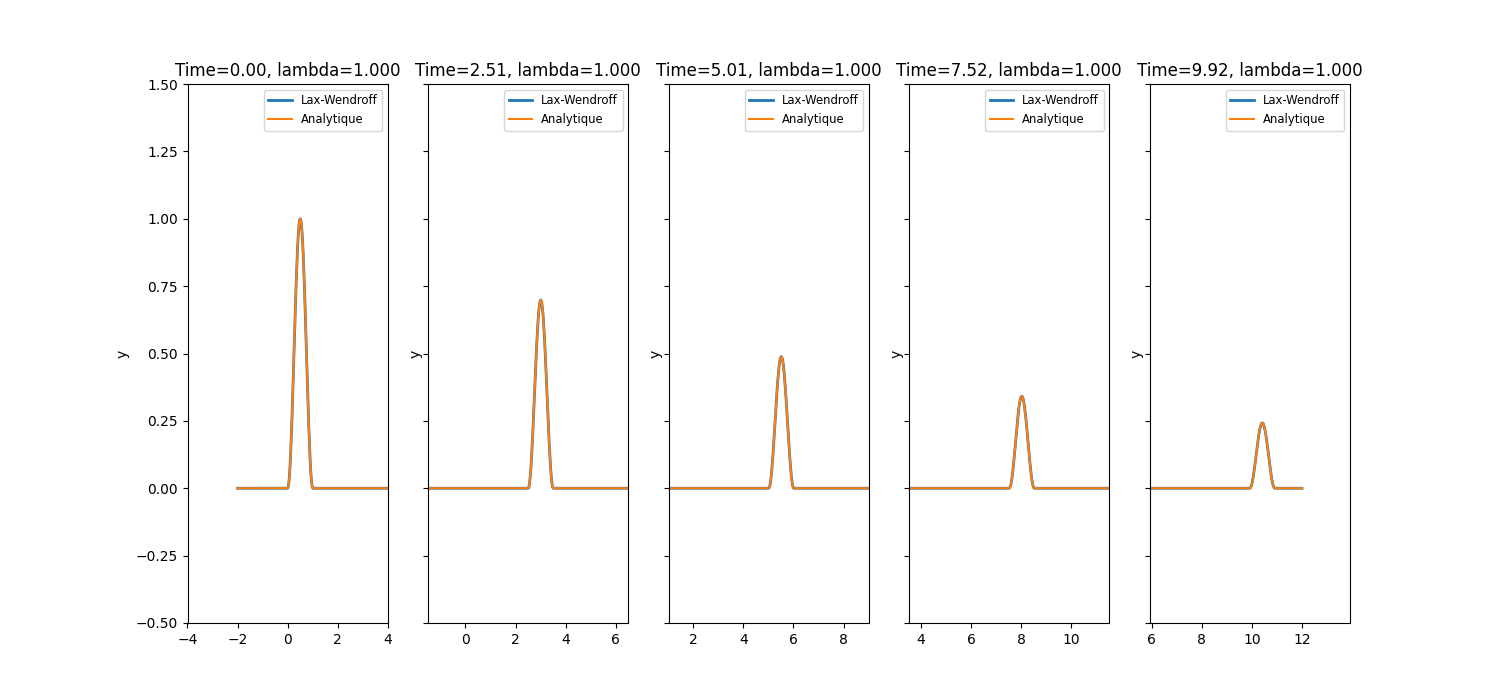

In [59]:
Mspan=[0,0.25,0.5,0.75,0.99]
fig,ax=plt.subplots(1,5,figsize=(15,7),sharey='row')
for i in range(len(Mspan)):
    n=int(np.floor(M*Mspan[i]))
    center_carre=0+a*t[n]
    center_cos=(b_cos+a_cos)/2+a*t[n]
    ax[i].plot(x,U_lw_radio[0][:,n],label='Lax-Wendroff',linewidth=2.)
    ax[i].plot(x,Sol[:,n],label='Analytique')
    ax[i].set_ylabel('y')
    ax[i].set_ylim((-0.5,1.5))
    ax[i].set_xlim((center_carre-4,center_carre+4))
    ax[i].set_title('Time=%.2f, lambda=%.3f'%(t[n],lmb))
    ax[i].legend(loc='best',fontsize='small')